# Lecture 3: describing data

We begin by loading the various libraries that we'll use, and setting the plotting parameters

In [1]:
library(tidyverse)
library(patchwork)
library(scales)

# set a simple black & white theme for our plots
theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Part 1: Interquartile range and standard deviation

Saving 6.67 x 6.67 in image



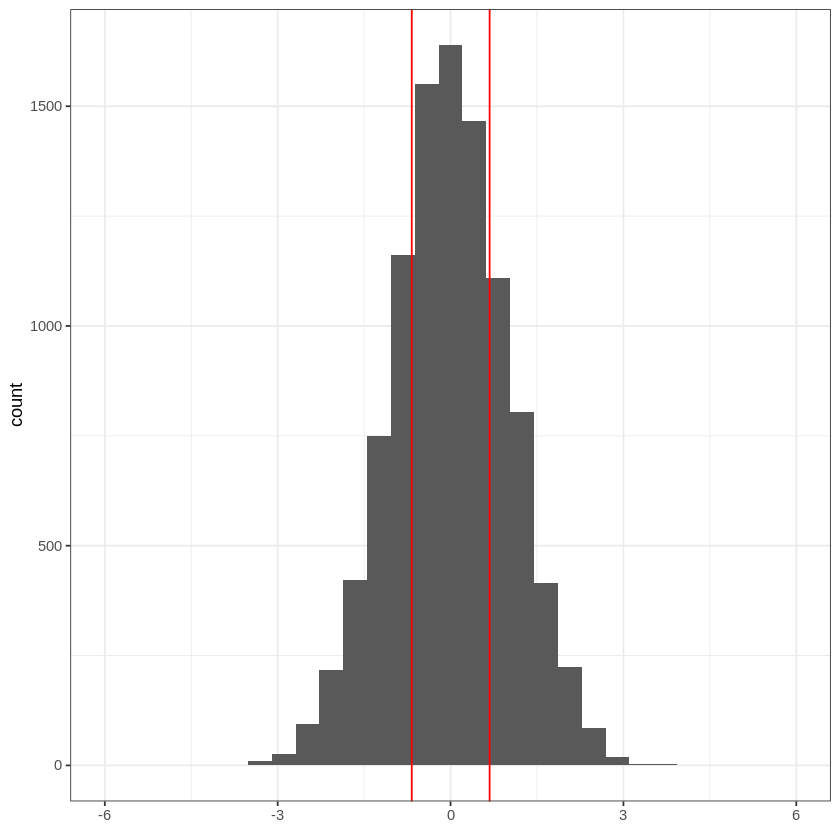

In [2]:
# generate and plot normally distributed data, with 25th and 75th quartiles highlighted
set.seed(1)
my_data <- tibble(value = rnorm(1e4, 0, 1))

ggplot(my_data, aes(x = value)) +
    geom_histogram(bins=30) +
    geom_vline(aes(xintercept = quantile(value, .25)), color='red') +
    geom_vline(aes(xintercept = quantile(value, .75)), color='red') +
    scale_x_continuous(element_blank(), limits=c(-6,6))

ggsave('figs/interquartile_range1.png')

Warning message:
“Removed 28 rows containing non-finite values (stat_bin).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 28 rows containing non-finite values (stat_bin).”


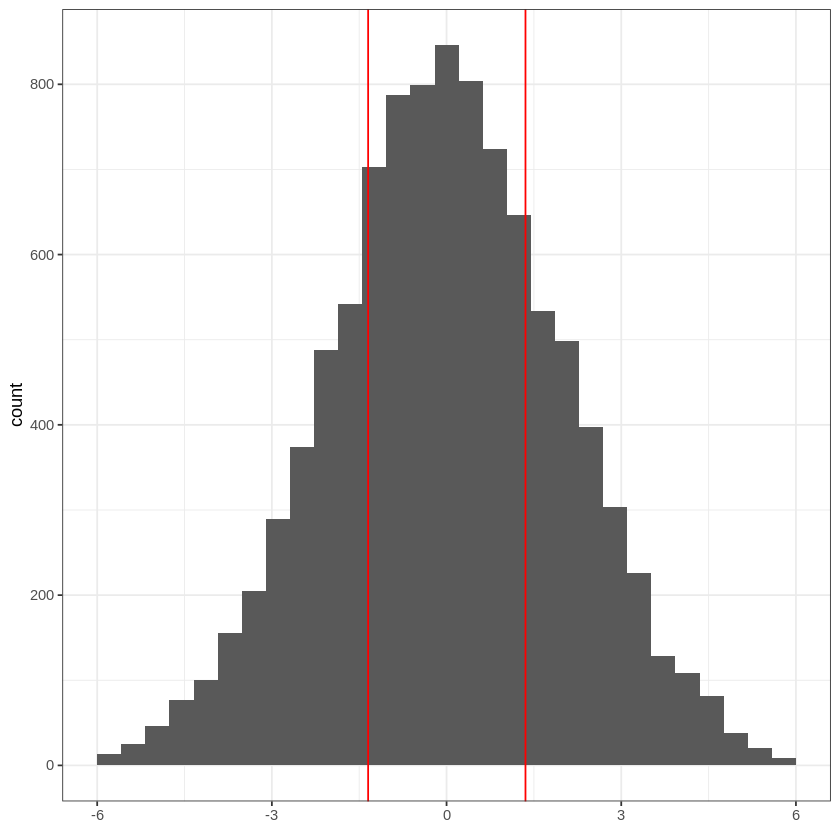

In [3]:
set.seed(1)
my_data <- tibble(value = rnorm(1e4, 0, 2))

ggplot(my_data, aes(x = value)) +
    geom_histogram(bins=30) +
    geom_vline(aes(xintercept = quantile(value, .25)), color='red') +
    geom_vline(aes(xintercept = quantile(value, .75)), color='red') +
    scale_x_continuous(element_blank(), limits=c(-6,6))

ggsave('figs/interquartile_range2.png')

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


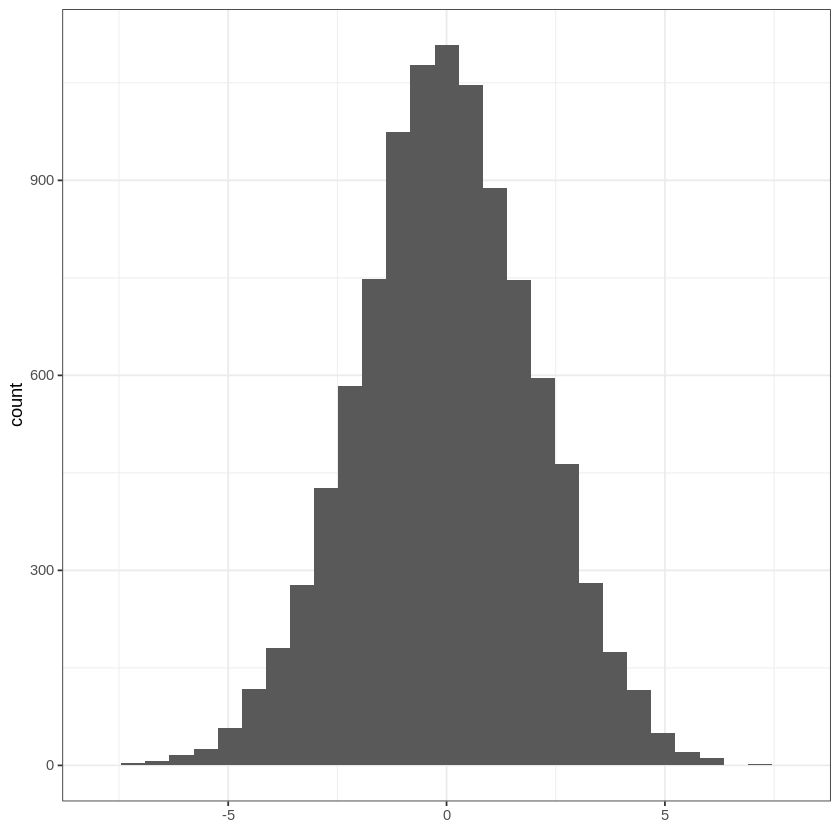

In [4]:
ggplot(my_data, aes(x = value)) +
    geom_histogram(bins=30) +
    scale_x_continuous(element_blank(), limits=c(-8,8))

ggsave('figs/variance1.png')

Warning message:
“Removed 1631 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 1631 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


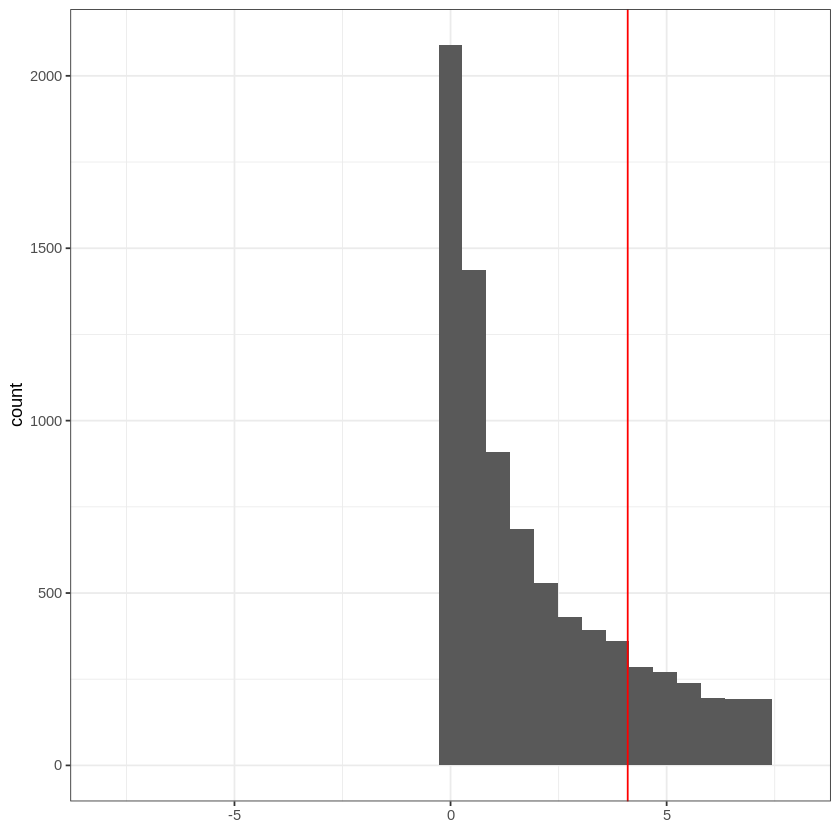

In [5]:
ggplot(my_data, aes(x = value^2)) +
    geom_histogram(bins=30) +
    geom_vline(aes(xintercept = mean(value^2)), color='red') +
    scale_x_continuous(element_blank(), limits=c(-8,8))

ggsave('figs/variance2.png')

## Part 2: Correlation

[1] 0.8157147

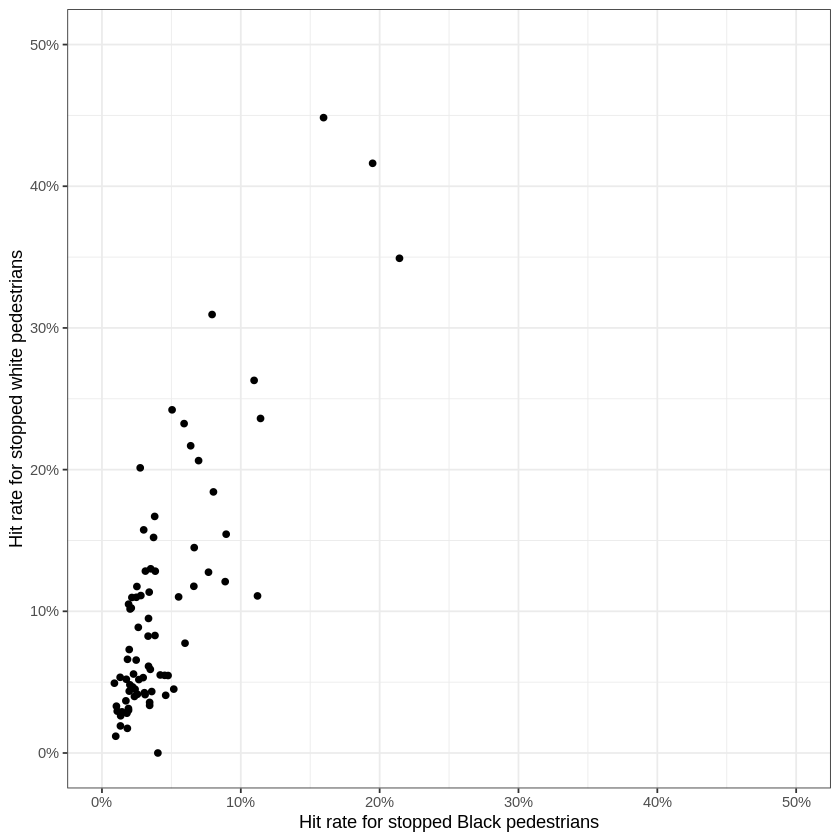

In [6]:
load('../data/sqf.Rdata')

ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('Hit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians',
                     labels=percent, limits=c(0, .5))

cor(hitrate_by_precinct$black, hitrate_by_precinct$white)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


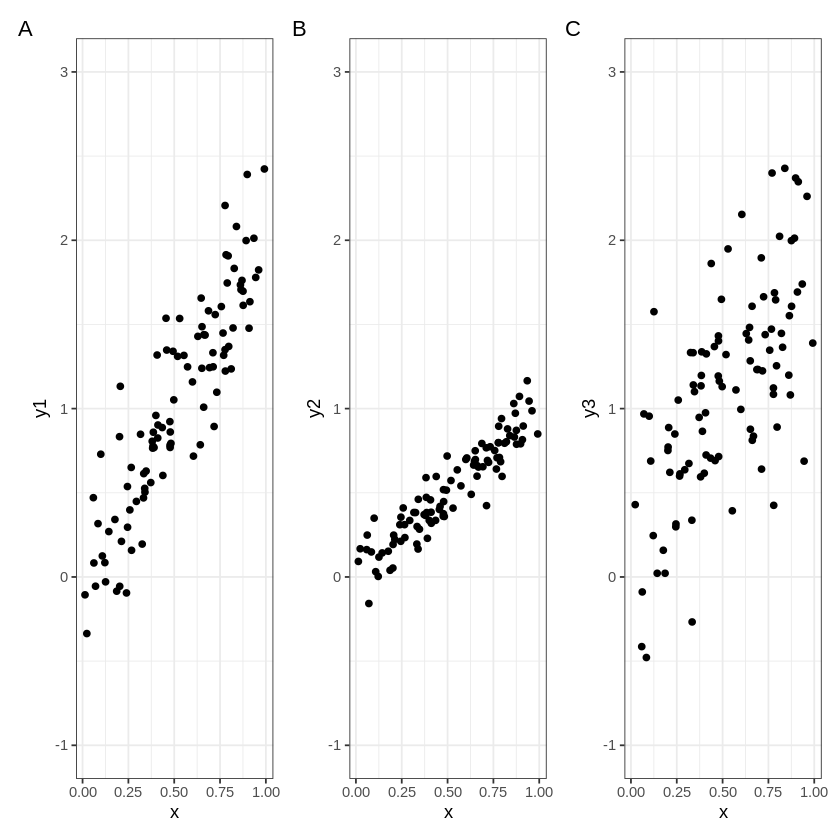

In [7]:
set.seed(1)
my_data <- tibble(
    x = runif(100), 
    y1 = 2*x + .3*rnorm(100),
    y2 = x + .1*rnorm(100),
    y3 = 2*x + .5*rnorm(100)
)

p1 <- ggplot(my_data, aes(x,y1)) + 
    geom_point() +
    scale_y_continuous(limits=c(-1, 3))

p2 <- ggplot(my_data, aes(x,y2)) + 
    geom_point() +
    scale_y_continuous(limits=c(-1, 3))

p3 <- ggplot(my_data, aes(x,y3)) + 
    geom_point() +
    scale_y_continuous(limits=c(-1, 3))


(p1 | p2 | p3) + plot_annotation(tag_levels = 'A')
ggsave('figs/correlation.png', width = 8, height = 4)

In [8]:
my_data %>%
    summarize(cor1 = cor(x, y1),
             cor2 = cor(x, y2),
             cor3 = cor(x, y3))

cor1,cor2,cor3
<dbl>,<dbl>,<dbl>
0.8939371,0.9288591,0.6767885


Saving 6.67 x 6.67 in image



[1] -0.08736356

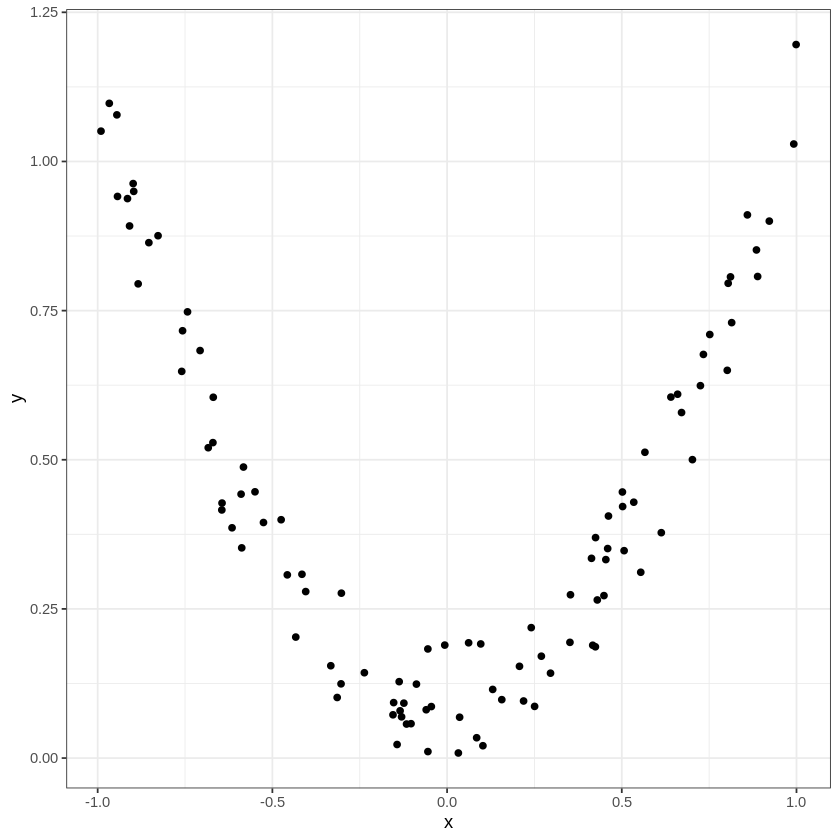

In [9]:
my_data <- tibble(
    x = runif(100, -1, 1), 
    y = x^2 + .2*runif(100)
)

ggplot(my_data, aes(x,y)) + geom_point()
ggsave('figs/correlation2.png')

cor(my_data$x, my_data$y)